<a href="https://colab.research.google.com/github/edx04/data-science/blob/main/Entrega1Arellano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detección de fraude en reclamaciones de seguro de automoviles** 

# Presentacion del problema




El fraude en la industria de los seguros ha mantenido su ritmo de crecimiento en los últimos años y a pesar de todas las tecnologías existentes no se ha podido disminuir el crecimiento y se hace cada vez más difícil su detección, pues los esquemas utilizados por los defraudadores siguen evolucionando.

Hoy en día, el fraude sigue siendo un gran problema para las aseguradoras. Tan solo en el 2019 en México se tuvo una pérdida de 430 millones de pesos en los seguros de automóviles ligados al fraude. Por lo cual, es necesario empezar a controlar estos reclamos. Esto se puede lograr a través de auditorías, sin embargo, debido a su costo, no es posible auditar todas las reclamaciones.

Por ello, una de las soluciones es hacer uso de modelos de aprendizaje máquina. El objetivo de este proyecto es investigar, analizar y evaluar el impacto que tienen los fraudes en los seguros de automóviles en la sociedad, así como analizar posteriormente diferentes modelos de aprendizaje máquina para poder predecir fraudes en automóviles para poder así prevenirlos y lograr una reducción en los costos de operación de las aseguradoras, misma que debería de reflejarse en una reducción de las primas, beneficiando así a los asegurados.

# PREGUNTAS CLAVES

    ¿Con qué modelo de carro se comenten más fraudes?
    ¿En qué estado se cometen más fraudes?
    ¿En qué rango de edad la gente es más propensa a cometer fraudes?
    ¿En los casos de fraude en promedio de cuanto es la cantidad reclamada?
    ¿Entre qué horas se comete el mayor número de fraudes?
    ¿Quiénes son más propensos a cometer fraude hombres o mujeres?
    ¿Cuantos meses como cliente en promedio tiene la gente que comete fraude?
    ¿Cual es el Nivel educativo de las personas que cometen fraude?
    ¿Cual es la ocupación más común de las personas que cometen fraude?
    ¿En los casos de fraude cuál fue la gravedad del accidente?
    ¿En los casos de fraude hubo testigos?

Pero la pregunta principal:
¿Cual de los factores mencionados anteriormente tiene más impacto?

Con base en las preguntas anteriores, se busca determinar como ASEGURADORA si las reclamaciones que se realizan día con día son fraude o no y así, verificar y prestar más atención a las variables antes mencionadas.

De acuerdo con los puntos anteriores y el impacto que tienen los fraudes en los seguros de automóviles en la sociedad, con este proyecto se busca analizar e investigar diferentes modelos de aprendizaje máquina para predecir fraudes en las reclamaciones de los seguros de automóviles, para poder así prevenirlos y lograr una reducción en los costos de operación de las aseguradoras, mismas que deberían reflejarse en una reducción en las primas, beneficiando así a los asegurados.


# Seleccion Dataset

El dataset que se va usar es una muestra de reclamos de seguros en Estados unidos

Se seleccionó porque es de un tamaño relativamente pequeño con el cual se puede trabajar de manera local

LINK: https://raw.githubusercontent.com/edx04/data-science/main/data/insurance_claims.csv

# EDA

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sn.set_theme(style="darkgrid")

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/edx04/data-science/main/data/insurance_claims.csv")



Primero revisamoslos primeros y ultimos datos del dataset, para analizar las columnas y los valores.

In [7]:
df.head(5)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
df.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


¿Qué tamaño tiene mi conjunto de datos? 

In [9]:


df.shape



(1000, 40)

Podemos notar que el conjunto de datos tiene 1000 filas y 40 columnas, lo cual, tiene un buen tamaño para ser procesado por medio de técnicas de clasificación.

* ¿Qué columnas tengo y qué información tengo en cada una de esas columnas?




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


### Cuantos de los datos son casos de fraude?

In [12]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(1,0))

df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Univariado

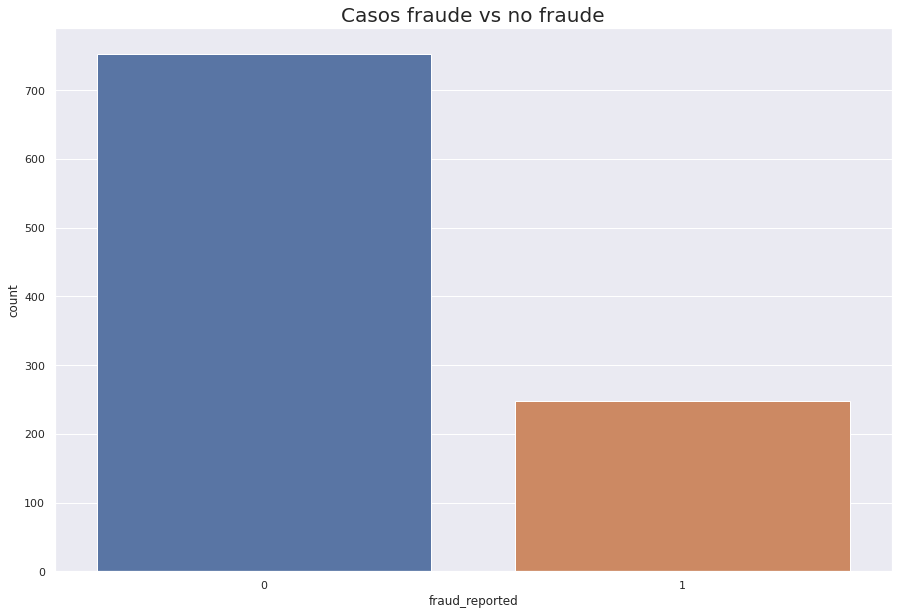

In [20]:
plt.title('Casos fraude vs no fraude', fontsize = 20)
sns.countplot(x='fraud_reported',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Años')

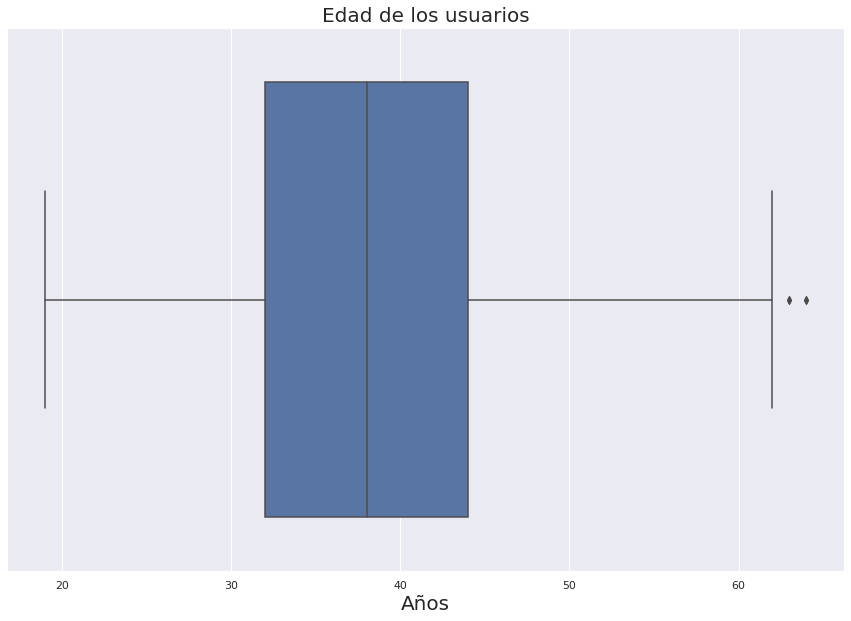

In [19]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Edad de los usuarios', fontsize = 20)
p = sns.boxplot(df['age'],orient='v')
p.set_xlabel("Años", fontsize = 20)



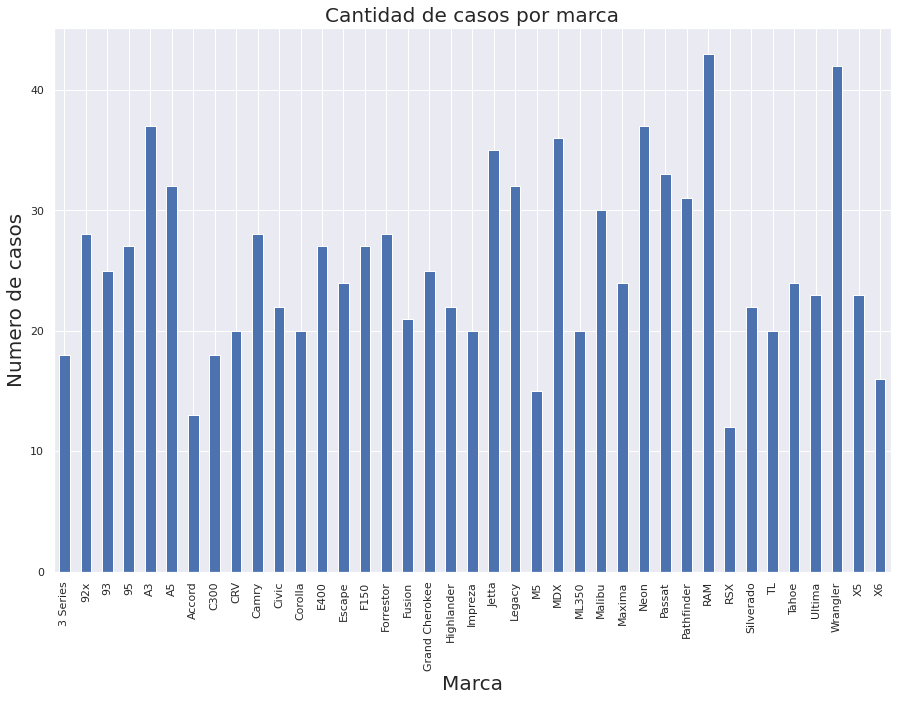

In [22]:
#Edad de empleados
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Cantidad de casos por marca', fontsize = 20)
plt.xlabel("Marca", fontsize = 20)
plt.ylabel("Numero de casos", fontsize = 20)
df.auto_model.value_counts().sort_index().plot.bar()

#Bivariado

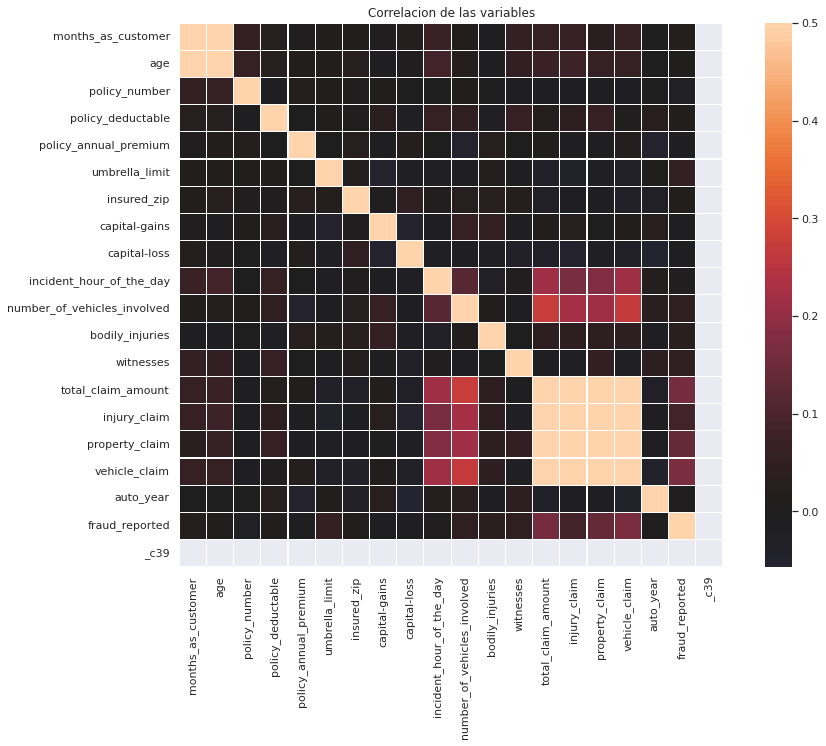

In [25]:
plt.title("Correlacion de las variables")
sns.heatmap(df.corr(), vmax=.5, center=0, annot=False, square=True, linewidths=.1)

Text(0, 0.5, 'Marca')

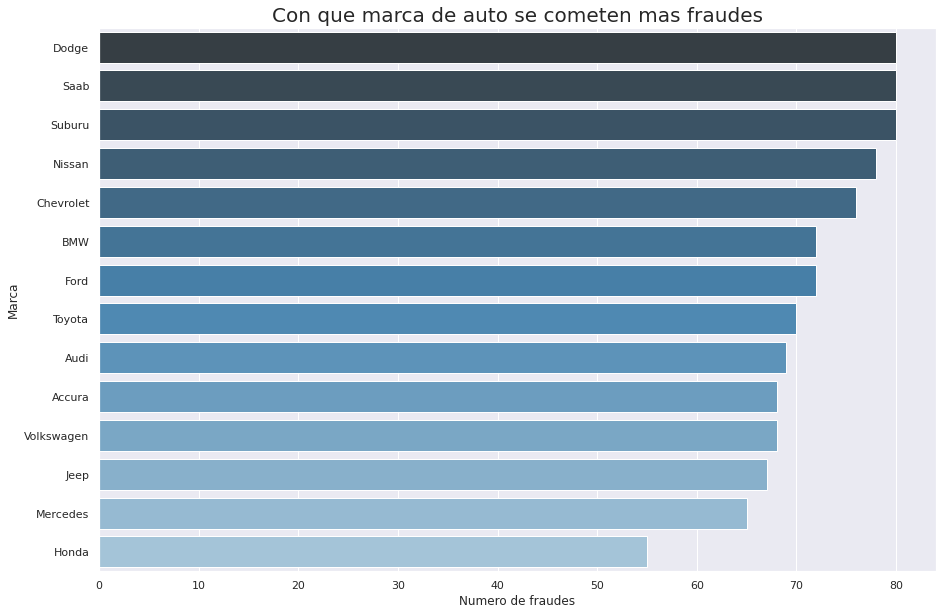

In [39]:
proporcion_df = df[['auto_make','fraud_reported']].groupby(['auto_make']).count().sort_values(by = 'fraud_reported', ascending = False)
proporcion_df.reset_index(inplace=True)
sns.barplot(data=proporcion_df , y='auto_make', x='fraud_reported', palette="Blues_r_d")
plt.title("Con que marca de auto se cometen mas fraudes", fontsize = 20)
plt.xlabel("Numero de fraudes")
plt.ylabel("Marca")




Text(0, 0.5, 'Numero de fraudes')

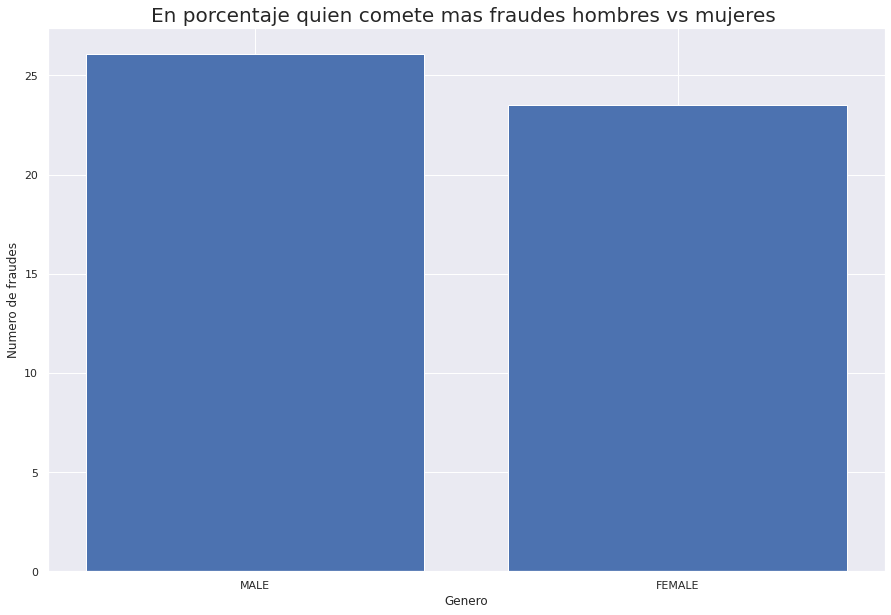

In [40]:
proporcion_df = df[['insured_sex','fraud_reported']].groupby(['insured_sex']).mean().sort_values(by = 'fraud_reported', ascending = False).round(3).multiply(100)
proporcion_df.reset_index(inplace=True)
plt.bar(proporcion_df['insured_sex'],proporcion_df['fraud_reported'])
plt.title("En porcentaje quien comete mas fraudes hombres vs mujeres ", fontsize = 20)
plt.xlabel("Genero")
plt.ylabel("Numero de fraudes")

## Multivariado

In [42]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


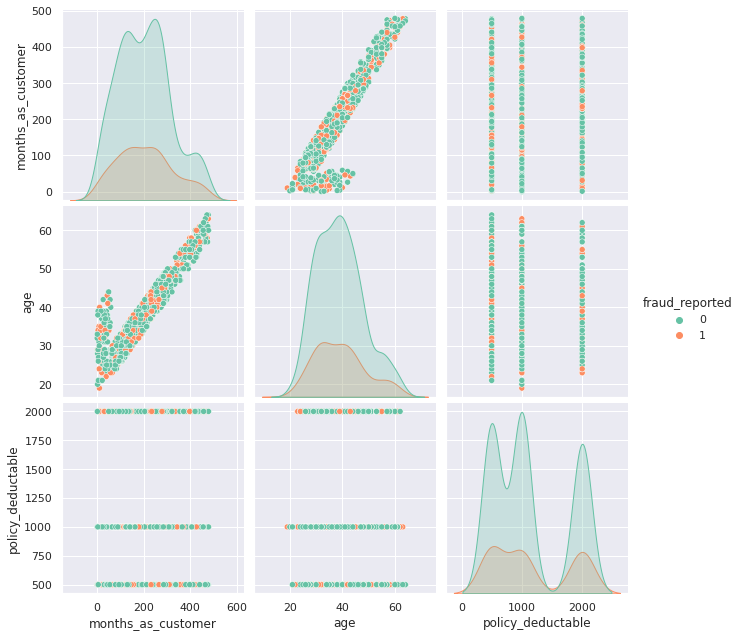

In [43]:
df_pair = df[['months_as_customer','age','auto_model','policy_deductable','fraud_reported']]
p = sns.pairplot(df_pair,hue = 'fraud_reported' , size = 3 , palette = 'Set2')


# Procesamiento de Datos

In [44]:
#funcion auxiliar para crear la tabla con el numero de valores unicos
def unique_values(x):
  temp_dict = {}
  for i in x:
    num_uniques = df[i].nunique()
    temp_dict[i] = num_uniques
  return pd.DataFrame.from_dict(temp_dict,orient='index',columns=['valores_unicos'])

In [46]:
#obtenemos las variables tipo object
df_object=df.loc[:, df.dtypes == object]
object_columns = df_object.columns
print(object_columns)



Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')


In [50]:
#obtenemos los vlaores unicos de las columnas con tipo unique

unique_values(object_columns)



,valores_unicos
policy_bind_date,951
policy_state,3
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6
incident_date,60
incident_type,4


In [53]:
#Checamos los valores NaN

df.isna().sum(axis=0)

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [54]:
proporcion_nan_collision_type = df.isna().sum(axis=0)['collision_type']/len(df)*100
proporcion_nan_property_damage = df.isna().sum(axis=0)['property_damage']/len(df)*100
proporcion_nan_police_report_available = df.isna().sum(axis=0)['police_report_available']/len(df)*100
print(f'- Los NaN de la variable "collision_type" representan un {proporcion_nan_collision_type.round(2)}% de los datos')
print(f'- Los NaN de la variable "property_damage" representan un {proporcion_nan_property_damage.round(2)}% de los datos')
print(f'- Los NaN de la variable "police_report_available" representan un {proporcion_nan_police_report_available.round(2)}% de los datos')


- Los NaN de la variable "collision_type" representan un 17.8% de los datos
- Los NaN de la variable "property_damage" representan un 36.0% de los datos
- Los NaN de la variable "police_report_available" representan un 34.3% de los datos



# Transformación de Datos

---




La columna incident location como se veia en la tabla de unique values todos sus valores son distintos pero si utilizamos la parte final del string nos puede ser de utilidad

In [56]:
df['incident_location'].head(10)

0        9935 4th Drive
1          6608 MLK Hwy
2     7121 Francis Lane
3      6956 Maple Drive
4          3041 3rd Ave
5    8973 Washington St
6     5846 Weaver Drive
7          3525 3rd Hwy
8       4872 Rock Ridge
9      3066 Francis Ave
Name: incident_location, dtype: object



La columna incident_location nos indica el tipo de camino donde sucedio el accidente como por ejemplo:

    9935 4th Drive
    6045 Andromedia St
    6608 MLK Hwy
    1416 Cherokee Ridge


In [57]:
df['type_road'] = df['incident_location'].apply(lambda x : x.split(" ")[-1])

In [58]:
df['type_road'].value_counts()

Drive    173
Lane     171
St       171
Ridge    171
Ave      161
Hwy      153
Name: type_road, dtype: int64

La variable policy_bind_date hay que convertirla a tipo Fecha

In [60]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')